In [1]:
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn import tree

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/Users/nicolekacirek/Desktop/USF/Fall_Module_2/Machine_Learning/msds621_election_decisons/data/final.csv')

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [7]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.loc[:, df.columns != 'WINNER']
y = df.WINNER

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [23]:
X_train

,STATE,RACE,S1_DEM_RATIO,S2_DEM_RATIO,S3_DEM_RATIO,S1_REP_RATIO,S2_REP_RATIO,S3_REP_RATIO,S1_COR(DD),S2_COR(DD),S3_COR(DD),S1_COR(RR),S2_COR(RR),S3_COR(RR)
5,1,0,1.008074,0.993018,0.996461,0.993601,1.008392,1.007885,0.969844,0.929706,0.972214,0.972057,0.958788,0.954943
8,1,0,0.946718,0.943294,0.967433,1.010474,1.022514,1.084984,0.969748,0.967659,0.895603,0.971081,0.982959,0.930813
38,3,0,1.106732,1.022023,1.007723,0.977954,0.980071,1.105251,0.945742,0.958957,0.966819,0.920437,0.959140,0.944470
46,5,0,1.069051,1.011908,1.009101,0.963382,0.985655,0.983686,0.961644,0.918073,0.754103,0.946853,0.847243,0.778956
39,3,0,1.070197,1.069136,1.023748,0.975292,0.954580,0.988266,0.728234,0.945100,0.980126,0.780794,0.948916,0.994171
42,5,0,1.039012,1.052211,1.033076,0.985755,0.965454,0.961066,0.984496,0.984512,0.920476,0.989893,0.980293,0.917144
4,1,0,1.043504,0.978456,0.986344,0.994108,1.008741,1.234639,0.972607,0.966400,0.961886,0.978070,0.956207,0.972580
49,5,0,1.089927,1.076452,1.045796,0.950995,0.933802,0.928983,0.987235,0.936534,0.979752,0.975862,0.950505,0.981361
31,3,0,1.118549,1.042771,1.004443,0.971345,0.976414,1.055636,0.958460,-0.065472,-0.042756,0.932918,0.014154,0.036649
10,1,0,1.572554,1.122839,1.004108,0.903869,0.884006,1.127571,0.961091,0.981357,0.977251,0.986926,0.989612,0.984290


In [24]:
clf = tree.DecisionTreeClassifier()

In [25]:
clf = clf.fit(X_train, y_train)

In [26]:
n_nodes = clf.tree_.node_count
n_nodes

21

In [27]:
try:
    import pydotplus
except ImportError:
    import pip
    import sys
    import subprocess
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'dit'])
    import pydotplus    

In [28]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz

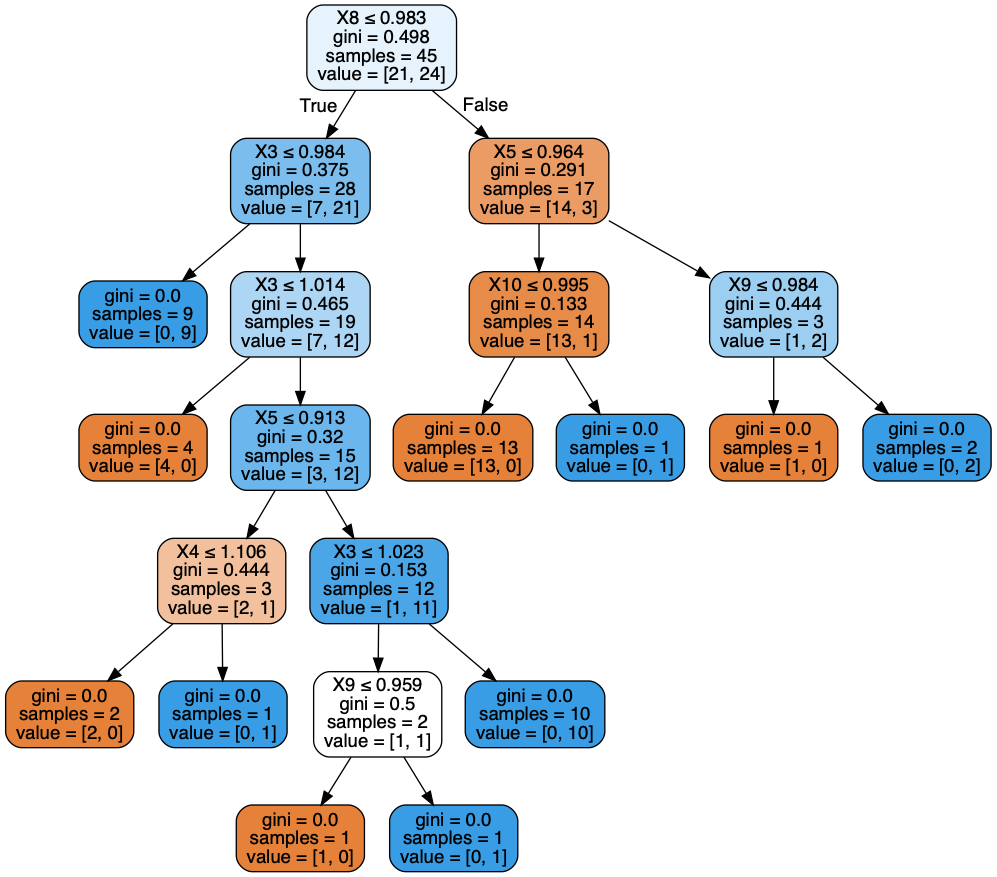

In [29]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
predicted = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(predicted, y_test):.3f}")

Accuracy: 0.333


In [36]:
kwargs_regularize = dict(min_samples_split=10)
dt = tree.DecisionTreeClassifier(**kwargs_regularize)
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)
print(f"Accuracy: {accuracy_score(predicted, y_test):.3f}")

Accuracy: 0.833


In [37]:
n_nodes = dt.tree_.node_count
n_nodes

13